# Submetrics : Finding the average degree pursue in each neighborhood

The data set I am using is `educational-attainment-for-the-population-25-years-and-over.csv` It is a survey that is done by **WPRDC** 

In [7]:
#load pandas
import pandas as pd
import numpy as np
import matplotlib as plt

#load dataset
educational_attainment = pd.read_csv("educational-attainment-for-the-population-25-years-and-over.csv", index_col= "Neighborhood")
educational_attainment.head(10)

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,Estimate; Total: - 1st grade,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,1002.0,139.000000,10.0,14.000000,0.0,10.000000,0.0,10.000000,0.0,...,87.0,52.000000,274.0,77.000000,80.0,46.000000,125.0,66.000000,8.0,11.000000
Allegheny West,2,293.0,72.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,...,16.0,10.000000,88.0,34.000000,33.0,29.000000,27.0,31.000000,20.0,26.000000
Allentown,3,1577.0,227.187148,19.0,27.000000,0.0,17.320508,0.0,17.320508,6.0,...,54.0,34.871192,70.0,42.626283,35.0,29.529646,22.0,29.597297,0.0,17.320508
Arlington,4,1296.0,218.515446,31.0,32.878564,0.0,17.320508,0.0,17.320508,0.0,...,147.0,59.405387,94.0,43.127717,25.0,22.158520,4.0,15.779734,0.0,17.320508
Arlington Heights,5,121.0,63.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
Banksville,6,3244.0,480.985447,5.0,20.518285,0.0,20.000000,0.0,20.000000,0.0,...,333.0,137.793323,606.0,163.874952,581.0,209.348991,75.0,59.539903,0.0,20.000000
Bedford Dwellings,7,740.0,96.000000,15.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,...,47.0,22.000000,26.0,23.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
Beechview,8,5905.0,522.106311,123.0,99.924972,0.0,31.622777,0.0,31.622777,0.0,...,633.0,147.621137,1105.0,222.198110,325.0,107.009345,87.0,57.818682,20.0,42.154478
Beltzhoover,9,1173.0,230.724944,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,...,46.0,55.901699,64.0,41.291646,72.0,45.563143,0.0,20.000000,0.0,20.000000


Based on the dataset above, we can see that this dataset has already listed out all neighborhoods in Pittsburgh, and people count in columns:
- No schooling completed
- Kindergarten
- 1st grade
- .......
- Associated's degree
- Bachelor's degree
- Master's degree
- Professional school degree
- Doctorate degree

This dataset is done in the purpose of counting the number of people who have a certain degree. 

And the purpose of our goal is to find out which neighborhood has the highest graduation rate( number of people have a degree / number of people graduate from certain schools )

In this case, we are adding different weight on each category. For example, in column `Doctorate degree`, we can add weight of 5. And in column `Associate's degree`, the weight would be 1. So, all columns will corresponding weight: 
- Doctorate degree: `number of columns`
- Master's degree: `number of columns - 1`
- Professional school degree: `number of columns - 2 `
- Bachelor's degree: `number of columns - 3`
- ...........

We find the sum of all columns and divide by the population the that neighbor. We will get a number that represents average degree in that that region. Then we rank the number and find out which neighbor has highest number. 

In [8]:
educational_attainment.shape

(91, 51)

We have 91 rows and 51 columns. Which means the highest weight will be (51 - 5 / 2). Because we have 3 columns will not be used, and we have margin of error. We ignore those column, so we divide by two. So, the highest weight will be 23. And it will reduce one as it goes down 1 degree. For example: 
- Doctorate degree: 23
- Master's degree: 22
- Professional school degree: 21
- Bachelor's degree: 20
- ...........

Filter out all `Margin of error` columns and select only columns that we want

In [9]:
exclude_column= []
for x in range(6, 51, 2):
    exclude_column.append(x)

print(exclude_column)
educational_attainment.drop(educational_attainment.columns[[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]], axis=1, inplace=True)
educational_attainment.shape
educational_attainment.head(10)

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]


,Id,Estimate; Total:,Estimate; Total: - No schooling completed,Estimate; Total: - Nursery school,Estimate; Total: - Kindergarten,Estimate; Total: - 1st grade,Estimate; Total: - 2nd grade,Estimate; Total: - 3rd grade,Estimate; Total: - 4th grade,Estimate; Total: - 5th grade,...,"Estimate; Total: - 12th grade, no diploma",Estimate; Total: - Regular high school diploma,Estimate; Total: - GED or alternative credential,"Estimate; Total: - Some college, less than 1 year","Estimate; Total: - Some college, 1 or more years, no degree",Estimate; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Estimate; Total: - Professional school degree,Estimate; Total: - Doctorate degree
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,1002.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,116.0,22.0,47.0,176.0,87.0,274.0,80.0,125.0,8.0
Allegheny West,2,293.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,36.0,16.0,10.0,32.0,16.0,88.0,33.0,27.0,20.0
Allentown,3,1577.0,19.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,...,39.0,579.0,205.0,139.0,318.0,54.0,70.0,35.0,22.0,0.0
Arlington,4,1296.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,412.0,94.0,90.0,259.0,147.0,94.0,25.0,4.0,0.0
Arlington Heights,5,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,9.0,34.0,19.0,0.0,0.0,0.0,0.0,0.0
Banksville,6,3244.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,923.0,88.0,146.0,256.0,333.0,606.0,581.0,75.0,0.0
Bedford Dwellings,7,740.0,15.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,8.0,291.0,114.0,55.0,88.0,47.0,26.0,0.0,0.0,0.0
Beechview,8,5905.0,123.0,0.0,0.0,0.0,38.0,0.0,0.0,12.0,...,107.0,1508.0,335.0,383.0,915.0,633.0,1105.0,325.0,87.0,20.0
Beltzhoover,9,1173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,409.0,98.0,90.0,203.0,46.0,64.0,72.0,0.0,0.0


In [10]:
row_count = 0
result = {}
average= {}
for index, row in educational_attainment.iterrows():
    print(f"{index}" )
    total_count_weighted = 0
    weight_count = 0
    for column_count in range(2, 26):
        total_count_weighted += (educational_attainment.iloc[row_count][ column_count] * weight_count)
        weight_count += 1
    result[index] = total_count_weighted
    average[index] = result[index] / educational_attainment.iloc[row_count][1]
    print("average_result: " + str(average[index]))
    row_count += 1

Allegheny Center
average_result: 18.51197604790419
Allegheny West
average_result: 18.802047781569964
Allentown
average_result: 16.04565630944832
Arlington
average_result: 16.044753086419753
Arlington Heights
average_result: 14.793388429752065
Banksville
average_result: 17.709001233045623
Bedford Dwellings
average_result: 15.316216216216215
Beechview
average_result: 16.86113463166808
Beltzhoover
average_result: 16.128729752770674
Bloomfield
average_result: 18.317150635208712
Bluff
average_result: 16.103782287822877
Bon Air
average_result: 17.0
Brighton Heights
average_result: 17.131500742942052
Brookline
average_result: 17.117537313432837
California-Kirkbride
average_result: 16.090180360721444
Carrick
average_result: 16.26741174867112
Central Business District
average_result: 19.474913494809687
Central Lawrenceville
average_result: 17.6113074204947
Central Northside
average_result: 17.67813490267089
Central Oakland
average_result: 17.771159874608152
Chartiers City
average_result: 16.823

Based on the result that we calculate from above, then we make a data frame to store all the information. 

In [11]:
rank = pd.DataFrame.from_dict(average, orient= 'index')
rank.columns = ['value']
rank

,value
Allegheny Center,18.511976
Allegheny West,18.802048
Allentown,16.045656
Arlington,16.044753
Arlington Heights,14.793388
...,...
Upper Lawrenceville,17.258404
West End,17.648352
West Oakland,17.377647
Westwood,16.254037


Then we sort the data frame in descending order. 

In [12]:
rank.sort_values(by=['value'], ascending=False)

,value
Squirrel Hill North,20.341665
Regent Square,20.258145
Strip District,20.238304
Point Breeze,20.130921
North Shore,20.064327
...,...
Northview Heights,15.195161
Chateau,15.000000
Spring Garden,14.849085
Arlington Heights,14.793388


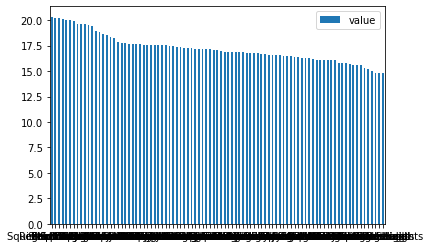

In [20]:
rank.sort_values(by=['value'], ascending=False).plot.bar(y='value', rot=0)

Showing the only 3 highest neighbor in the chart. 

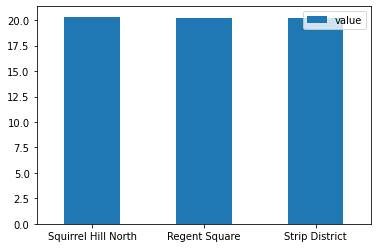

In [19]:
rank.sort_values(by=['value'], ascending=False).head(3).plot.bar(y='value', rot=0)

# Conclusion

Answer: The winner is Squirrel Hill North

In the descending order, the neighbor has the highest average degree is `Squirrel Hill North`, the value 20.34 corresponding to the column `Some college, less than 1 year`, which mean most of the people in that area have went to some college less than 1 year. 

However, the problem will this dataset is that most of the neighbor have a tie. For example, in the first 5 rows, the values are around 20. The decimal does not really need to put into consideration. For my next step of researching/ analyzing, I will find a way to amplify the difference between each neighbor, for example, adding more weights to higher degrees, and less weight on lower degree. 